In [619]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### 1. 데이터 Loading

In [621]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### 2. 데이터 전처리(preprocessing), Feature 추출

In [623]:
df.shape

(400, 5)

In [624]:
df['Purchased'].values.reshape(-1,1).shape

(400, 1)

In [625]:
df['Age'].values.reshape(-1,1).shape

(400, 1)

In [626]:
df['EstimatedSalary'].values.reshape(-1,1).shape

(400, 1)

In [627]:
X = np.hstack([np.ones([400, 1]), df['Age'].values.reshape(-1,1), df['EstimatedSalary'].values.reshape(-1,1)])
y = df['Purchased'].values.reshape(-1,1)

### 3. 학습 데이터를 데이터의 80%(320개), 테스트 데이터를 20%(80개)로 분할 사용

In [629]:
# 값 범위가 많이 다름 
# 스케일링 필요

print(X[:, 2])

print("=" * 100)

print(X[:, 1])

[ 19000.  20000.  43000.  57000.  76000.  58000.  84000. 150000.  33000.
  65000.  80000.  52000.  86000.  18000.  82000.  80000.  25000.  26000.
  28000.  29000.  22000.  49000.  41000.  22000.  23000.  20000.  28000.
  30000.  43000.  18000.  74000. 137000.  16000.  44000.  90000.  27000.
  28000.  49000.  72000.  31000.  17000.  51000. 108000.  15000.  84000.
  20000.  79000.  54000. 135000.  89000.  32000.  44000.  83000.  23000.
  58000.  55000.  48000.  79000.  18000. 117000.  20000.  87000.  66000.
 120000.  83000.  58000.  19000.  82000.  63000.  68000.  80000.  27000.
  23000. 113000.  18000. 112000.  52000.  27000.  87000.  17000.  80000.
  42000.  49000.  88000.  62000. 118000.  55000.  85000.  81000.  50000.
  81000. 116000.  15000.  28000.  83000.  44000.  25000. 123000.  73000.
  37000.  88000.  59000.  86000. 149000.  21000.  72000.  35000.  89000.
  86000.  80000.  71000.  71000.  61000.  55000.  80000.  57000.  75000.
  52000.  59000.  59000.  75000.  72000.  75000.  5

In [630]:
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler() 
scaler.fit(X[:, 1:3])
X_scaled = scaler.transform(X[:, 1:3])

In [631]:
print(X_scaled[:, 1])

print("=" * 100)

print(X_scaled[:, 0])

[-1.49004624 -1.46068138 -0.78528968 -0.37418169  0.18375059 -0.34481683
  0.41866944  2.35674998 -1.07893824 -0.13926283  0.30121002 -0.52100597
  0.47739916 -1.51941109  0.35993973  0.30121002 -1.3138571  -1.28449224
 -1.22576253 -1.19639767 -1.40195167 -0.60910054 -0.84401939 -1.40195167
 -1.37258681 -1.46068138 -1.22576253 -1.16703281 -0.78528968 -1.51941109
  0.12502088  1.97500684 -1.5781408  -0.75592482  0.59485858 -1.25512738
 -1.22576253 -0.60910054  0.06629116 -1.13766796 -1.54877595 -0.55037082
  1.123426   -1.60750566  0.41866944 -1.46068138  0.27184516 -0.46227625
  1.91627713  0.56549373 -1.1083031  -0.75592482  0.38930459 -1.37258681
 -0.34481683 -0.4329114  -0.63846539  0.27184516 -1.51941109  1.38770971
 -1.46068138  0.50676401 -0.10989798  1.47580428  0.38930459 -0.34481683
 -1.49004624  0.35993973 -0.19799255 -0.05116826  0.30121002 -1.25512738
 -1.37258681  1.27025028 -1.51941109  1.24088543 -0.52100597 -1.25512738
  0.50676401 -1.54877595  0.30121002 -0.81465453 -0

In [632]:
X_scaled = np.hstack([np.ones([400, 1]), X_scaled ])

In [633]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2)

In [634]:
print(X_train.shape, y_train.shape)

(320, 3) (320, 1)


### 4. 학습데이터에 대해 로지스틱회귀 모델 구성

In [636]:
# 예측함수 : Sigmoid 함수 > σ(w0 + w1x1 + w2x2)
# 앞에서 만들어 낸 변수 기반으로 만들어 내기 

# 시그모이드 함수 
def h(x,w):
    return 1/(1 + np.exp(-x*w))

### 5. 경사하강법을 이용해서 모델 학습하고, 파라미터 값 출력

In [638]:
h(X_train,w).shape

(320, 1)

In [639]:
w = np.zeros([3,1])

alpha = 0.01

w = np.asmatrix(w)
X_train = np.asmatrix(X_train)
y_train = np.asmatrix(y_train)


# 로그우도함수 미분 > -X.T*(y - h(X,w))
for i in range(10000):
    df = -X_train.T*(y_train - h(X_train,w) )
    w = w - alpha*df

print("w0 : ", w[0, 0])
print("w1 : ", w[1, 0])
print("w2 : ", w[2, 0])


w0 :  -1.2466220369826733
w1 :  2.283653086441942
w2 :  1.2557215742049526


### 6. 모델의 시각화

In [641]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

C1 = np.where(y_train == 1)[0]
C0 = np.where(y_train == 0)[0]

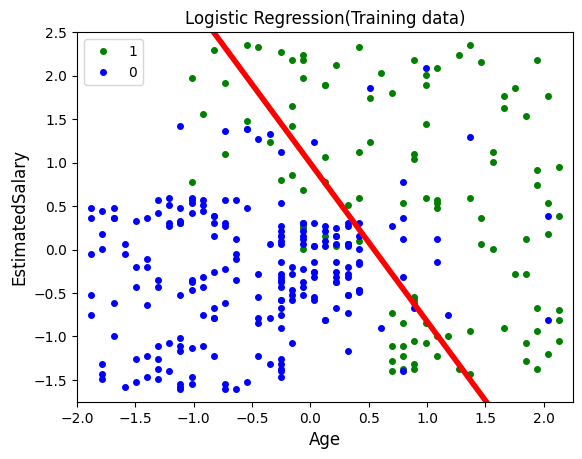

In [642]:
xp = np.linspace(-2,2.25,100).reshape(-1,1)
yp = - w[1,0]/w[2,0]*xp - w[0,0]/w[2,0]

plt.plot(X_train[C1, 1], X_train[C1, 2], 'go', markersize = 4, label = "1")
plt.plot(X_train[C0, 1], X_train[C0, 2], 'bo', markersize = 4, label = "0")
plt.plot(xp, yp, 'r', linewidth = 4)
plt.title('Logistic Regression(Training data)')
plt.xlabel("Age", fontsize= 12)
plt.ylabel("EstimatedSalary", fontsize= 12)
plt.xlim([-2, 2.25])
plt.ylim([-1.75, 2.5])
plt.legend()
plt.show()

### 7. scikit-learn Library를 이용, 모델 학습하고, 파라미터 값 출력 print(w0, w1, w2)

In [644]:
clf = linear_model.LogisticRegression()

In [645]:
clf.fit(X_train[:, 1:3], np.ravel(y_train))

LogisticRegression()

In [646]:
clf.coef_

array([[2.09872828, 1.15634787]])

In [647]:
print("w0 : ", clf.intercept_[0])
print("w1 : ", clf.coef_[0, 0])
print("w2 : ", clf.coef_[0, 1])


w0 :  -1.185499266647376
w1 :  2.0987282827192306
w2 :  1.1563478720814717


### 8. 모델의 시각화

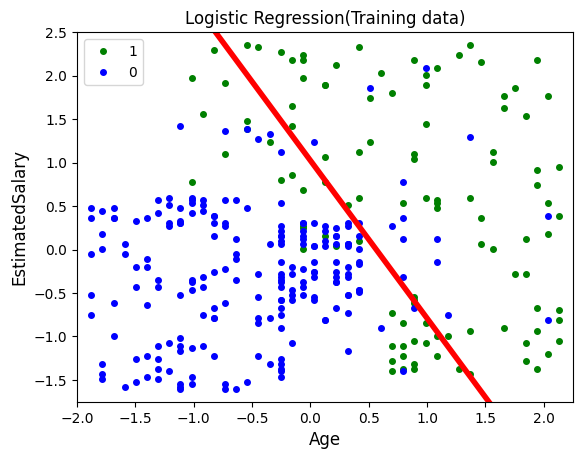

In [649]:
w0 = clf.intercept_[0]
w1 = clf.coef_[0,0]
w2 = clf.coef_[0,1]

xp = np.linspace(-2,2.25,100).reshape(-1,1)
yp = - w1/w2*xp - w0/w2

plt.plot(X_train[C1, 1], X_train[C1, 2], 'go', markersize = 4, label = "1")
plt.plot(X_train[C0, 1], X_train[C0, 2], 'bo', markersize = 4, label = "0")
plt.plot(xp, yp, 'r', linewidth = 4)
plt.title('Logistic Regression(Training data)')
plt.xlabel("Age", fontsize= 12)
plt.ylabel("EstimatedSalary", fontsize= 12)
plt.xlim([-2, 2.25])
plt.ylim([-1.75, 2.5])
plt.legend()
plt.show()

### (평가외 추가 코딩) 로지스틱회귀로 얻은 예측값(y_pred)을 테스트 데이터로 평가해보기

In [651]:
X_test.shape

(80, 3)

In [652]:
y_pred = clf.predict(X_test[:, 1:3]) # 테스트 데이터만 사용됨
result = accuracy_score(y_test, y_pred) # 모델의 정확도

In [653]:
result

# 꽤 높은 것을 확인 
# 변수를 더 조작해서 넣으면 성능이 올라 갈 듯 하다 .

0.825

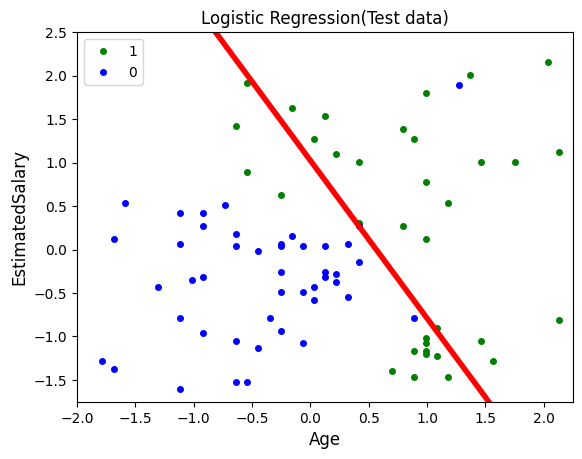

In [654]:
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

C1 = np.where(y_test == 1)[0]
C0 = np.where(y_test == 0)[0]

w0 = clf.intercept_[0]
w1 = clf.coef_[0,0]
w2 = clf.coef_[0,1]

xp = np.linspace(-2,2.25,100).reshape(-1,1)
yp = - w1/w2*xp - w0/w2

plt.plot(X_test[C1, 1], X_test[C1, 2], 'go', markersize = 4, label = "1")
plt.plot(X_test[C0, 1], X_test[C0, 2], 'bo', markersize = 4, label = "0")
plt.plot(xp, yp, 'r', linewidth = 4)
plt.title('Logistic Regression(Test data)')
plt.xlabel("Age", fontsize= 12)
plt.ylabel("EstimatedSalary", fontsize= 12)
plt.xlim([-2, 2.25])
plt.ylim([-1.75, 2.5])
plt.legend()
plt.show()

In [655]:
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("Social_Network_Ads.csv")

le = LabelEncoder()

df['Gender_encoded'] = le.fit_transform(df['Gender'])


In [656]:
df['Purchased'].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [657]:
df['Gender_encoded'].value_counts() 

Gender_encoded
0    204
1    196
Name: count, dtype: int64

In [658]:
df[['Gender', 'Gender_encoded']].head()
# 남자가 1임

,Gender,Gender_encoded
0,Male,1
1,Male,1
2,Female,0
3,Female,0
4,Male,1


<BarContainer object of 2 artists>

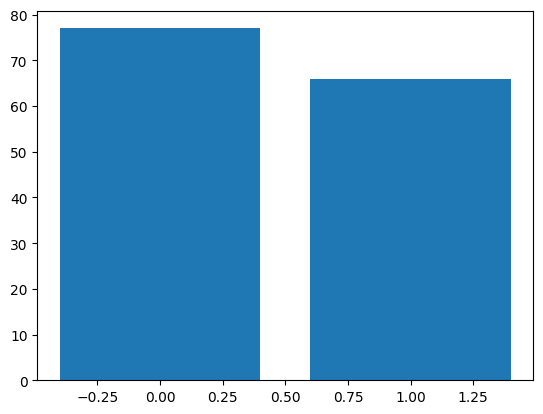

In [659]:
df_Purchase_Gender = df.groupby('Gender_encoded').agg({"Purchased" : "sum"})
plt.bar(np.ravel(df_Purchase_Gender.index), np.ravel(df_Purchase_Gender.values))

# 여자가 더 많이 구매 

In [660]:
X_scaled

array([[ 1.        , -1.78179743, -1.49004624],
       [ 1.        , -0.25358736, -1.46068138],
       [ 1.        , -1.11320552, -0.78528968],
       ...,
       [ 1.        ,  1.17910958, -1.46068138],
       [ 1.        , -0.15807423, -1.07893824],
       [ 1.        ,  1.08359645, -0.99084367]])

In [661]:
new_X = np.hstack([X_scaled[:, 1:3], df['Gender_encoded'].values.reshape(-1, 1)])



X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size = 0.2)

print(X_train.shape, y_train.shape)

clf = linear_model.LogisticRegression()
clf.fit(X_train, np.ravel(y_train))

y_pred = clf.predict(X_test) # 테스트 데이터만 사용됨
result = accuracy_score(y_test, y_pred) # 모델의 정확도

(320, 3) (320, 1)


In [662]:
result
# 큰 변화는 없지만 약간 올라간 것이 보인다! 

0.85